In [2]:
plt.rcParams['figure.figsize']=(15,5)

In [3]:
tr = pd.read_csv('train.csv', index_col='Date', parse_dates=['Date'], low_memory=False)

In [4]:
# tr['Month'] = tr.index.month
# tr['Year'] = tr.index.year
# tr.sort_values('Date', inplace=True)
tr.sort_index(inplace=True)

In [200]:
tr.ix[(tr.Store==idx)&(tr.Open==1)]['2014-01-06':'2014-09-30'].head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2014-01-06,2,1,8317,823,1,1,0,0
2014-01-07,2,2,6567,727,1,1,0,0


In [201]:
tr.ix[(tr.Store==idx)&(tr.Open==1)]['2013-01-07':'2013-09-30'].head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-07,2,1,6775,763,1,1,0,0
2013-01-08,2,2,6318,685,1,1,0,0


In [224]:
same_promo = np.bool_(promo13*promo14)
sales14[same_promo].sum()/sales13[same_promo].sum()

1.0097950989251183

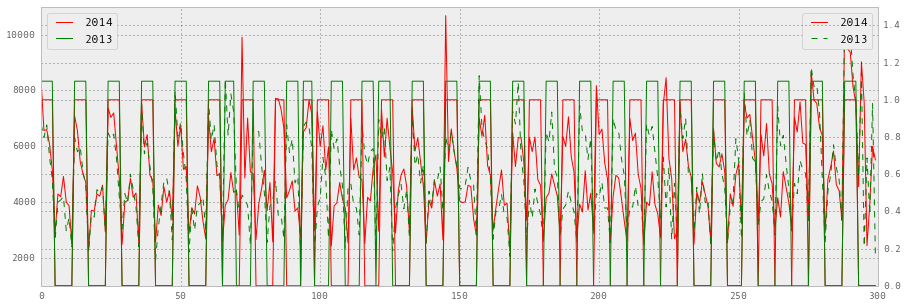

In [251]:
idx=2
sales14 = tr.ix[(tr.Store==idx)&(tr.Open==1),'Sales']['2014-01-06':'2014-12-30'].values
sales13 = tr.ix[(tr.Store==idx)&(tr.Open==1),'Sales']['2013-01-07':'2013-12-31'].values
promo14 = tr.ix[(tr.Store==idx)&(tr.Open==1),'Promo']['2014-01-06':'2014-12-30'].values
promo13 = tr.ix[(tr.Store==idx)&(tr.Open==1),'Promo']['2013-01-07':'2013-12-31'].values


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(sales14, 'r')
ax1.plot(sales13, 'g--')
ax1.legend(['2014', '2013'])
ax1.set_ylim([1000,11000])
ax2.plot(promo14, 'r')
ax2.plot(1.1*promo13, 'g')
ax2.set_ylim([0,1.5])
ax2.legend(['2014','2013'], loc='upper left');

In [252]:
idx_promo14 = (promo14>0) * (promo13==0)
sales14[idx_promo14].sum()/sales13[idx_promo14].sum()

1.502641558357372

In [270]:
np.sqrt(np.mean((sales14[idx_promo14]/(1.4*sales13[idx_promo14]) -1)**2))

0.28607782703193663

In [253]:
idx_promo13 = (promo13>0) * (promo14==0)
sales13[idx_promo13].sum()/sales14[idx_promo13].sum()

1.474037846468452

In [266]:
np.sqrt(np.mean((1.4*sales14[idx_promo13]/(sales13[idx_promo13]) -1)**2))

0.21332064214841492

In [271]:
idx_nopromo = (promo14==0)*(promo13==0)
np.sqrt(np.mean(((sales14[idx_nopromo]/sales13[idx_nopromo]-1)**2)))

0.32963028666436278

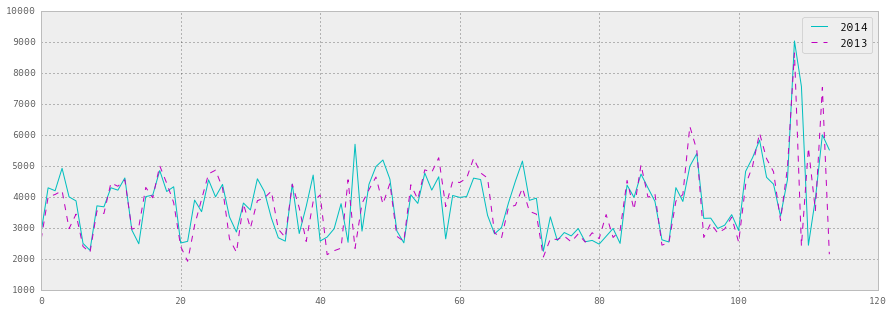

In [287]:
plt.plot(sales14[idx_nopromo], 'c')
plt.plot(sales13[idx_nopromo], 'm--')
plt.legend(['2014','2013']);